<a href="https://colab.research.google.com/github/scardenol/RP_argos/blob/main/genetic_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import random
# np.random.seed(42)

# array: np.array, [list, ..., list], list

def generate_population(P_size: 'tuple') -> 'array':
  P = 0.1*np.random.chisquare(df=1, size=P_size) # Initial population
  return P.tolist()

def mse(A: 'array', B: 'array') -> float: # Cleanest way to calculate MSE
  return np.square(np.subtract(A, B)).mean()

def fitness(X: 'array', Y: list, P: 'array', fun: 'function') -> list:
  '''
  X = [X1, X2, ..., Xn]: observations of predictors
  Y: observations of variable of interest
  P = [theta1, theta2, ..., thetan]: population (possible parameters)
  '''
  Y_bar = [[fun(*[item[i] for item in X], *P[j]) for i in range(len(X[0]))] for j in range(len(P))]
  fitness = [mse(Y_bar[i], Y) for i in range(len(P))]
  return fitness, Y_bar

def selection(P: 'array', fitness: list) -> 'array':
  return random.choices(population=P, weights=fitness, k=2)

def crossover(x: list, y: list) -> 'Tuple' : # Single point
  if len(x) != len(y):
    raise ValueError("Parents x and y need to be of same length")

  length = len(x)

  if length < 2:
    return x, y

  p = random.randint(1, length-1)
  return x[0:p] + y[p:], y[0:p] + x[p:]

def mutation(x: list, probability: float, num: int) -> list:
  for _ in range(num):
    index = random.randrange(len(x))
    value = random.randint(1,1)*np.random.uniform(-1.0, 1.0, 1) # Uniform mutation
    x[index] = x[index] if random.random() > probability else x[index] + value[0]
  return x

def evolution():
  return

In [27]:
X = [[1,2,3,4], [2.1, 4.1, 6.1, 8.1]]
Y = [2, 4, 6, 8]
P = [[0.1, 0.2, 0.3, 0.4], [0, 1, 2, 3], [4, 3, 2, 1], [10, 8, 6, 4], [4, 6, 8, 10]]

def fun(x1, x2, a, b, c, d):
  return (a*x1 + b*x2 + c + d)

fit, _ = fitness(X,Y,P,fun)
generate_population(np.array(P).shape)
sel = selection(P, fit)
print(sel)
x, y = crossover(sel[0], sel[1])
print(x, y)
mutation(x, 1, 1)
lambda X, Y, P, fun: fitness(X,Y,P,fun)

[[10, 8, 6, 4], [10, 8, 6, 4]]
[10, 8, 6, 4] [10, 8, 6, 4]


<function __main__.<lambda>>

In [32]:
m_prob = 0.5 # Probabilidad de mutación
P = generate_population((5,4)) # (individuos, parámetros)
generations = 300
for i in range(generations):
  fit, _ = fitness(X,Y,P,fun)
  P = [a for _, a in sorted(zip(fit, P))] # Ordena la población de menor a mayor fitness
  
  next_generation = P[0:2] # Guarda los 2 mejores

  for j in range(int(len(P) / 2) - 1):
    parents = selection(P,fit)
    x, y = crossover(parents[0], parents[1])
    x = mutation(x, m_prob, 1)
    next_generation += [x,y]

  P = next_generation
  fit, Y_bar = fitness(X,Y,P,fun)
  P = [a for _, a in sorted(zip(fit, P))] # Ordena la población de menor a mayor fitness
  display(i)
  print('')
  display(P)
  print('')
  display(fit)

print(f'best solution: {P[0]}')
print(f'Fitness: {fit[0]}')
print(f'Y_hat: {Y_bar[0]}')

0

[[0.16958409000256103,
  0.33412060054844717,
  0.13271899084134905,
  0.008416534485318473],
 [0.23360570640487655,
  0.041707618740564924,
  0.16439358220798317,
  0.007396219445411485],
 [0.005665595438843222,
  0.005420705773649626,
  0.019179495932637392,
  0.014723090584490662],
 [0.005665595438843222,
  0.005420705773649626,
  0.019179495932637392,
  0.014723090584490662]]

[9.14606831847275, 19.793411179210935, 29.166416154446928, 29.166416154446928]

1

[[0.16958409000256103,
  0.33412060054844717,
  0.13271899084134905,
  0.008416534485318473],
 [0.23360570640487655,
  0.041707618740564924,
  0.16439358220798317,
  0.007396219445411485],
 [0.23360570640487655,
  0.041707618740564924,
  0.16439358220798317,
  0.007396219445411485],
 [0.23360570640487655,
  0.041707618740564924,
  0.16439358220798317,
  0.007396219445411485]]

[9.14606831847275, 19.793411179210935, 19.793411179210935, 19.793411179210935]

2

[[0.16958409000256103,
  0.33412060054844717,
  0.13271899084134905,
  0.008416534485318473],
 [0.23360570640487655,
  0.041707618740564924,
  0.16439358220798317,
  0.007396219445411485],
 [0.23360570640487655,
  0.041707618740564924,
  0.16439358220798317,
  0.007396219445411485],
 [0.23360570640487655,
  0.041707618740564924,
  -0.17119858383481112,
  0.007396219445411485]]

[9.14606831847275, 19.793411179210935, 22.611904242045412, 19.793411179210935]

3

[[0.16958409000256103,
  0.33412060054844717,
  0.13271899084134905,
  0.008416534485318473],
 [0.23360570640487655,
  0.041707618740564924,
  0.16439358220798317,
  0.007396219445411485],
 [0.23360570640487655,
  0.041707618740564924,
  0.16439358220798317,
  0.007396219445411485],
 [-0.3250665314853939,
  0.041707618740564924,
  0.16439358220798317,
  0.007396219445411485]]

[9.14606831847275, 19.793411179210935, 35.74625492462418, 19.793411179210935]

4

[[0.16958409000256103,
  0.33412060054844717,
  0.13271899084134905,
  0.008416534485318473],
 [0.23360570640487655,
  0.041707618740564924,
  0.16439358220798317,
  0.007396219445411485],
 [-0.3250665314853939,
  0.041707618740564924,
  0.16439358220798317,
  0.007396219445411485],
 [-0.3250665314853939,
  0.041707618740564924,
  0.16439358220798317,
  0.007396219445411485]]

[9.14606831847275, 19.793411179210935, 35.74625492462418, 35.74625492462418]

5

[[0.16958409000256103,
  0.33412060054844717,
  0.13271899084134905,
  0.008416534485318473],
 [0.23360570640487655,
  0.041707618740564924,
  0.16439358220798317,
  0.007396219445411485],
 [-0.3250665314853939,
  0.041707618740564924,
  0.16439358220798317,
  0.007396219445411485],
 [-0.3250665314853939,
  0.041707618740564924,
  0.16439358220798317,
  0.007396219445411485]]

[9.14606831847275, 19.793411179210935, 35.74625492462418, 35.74625492462418]

6

[[0.16958409000256103,
  0.33412060054844717,
  0.13271899084134905,
  0.008416534485318473],
 [0.23360570640487655,
  0.041707618740564924,
  0.16439358220798317,
  0.007396219445411485],
 [-0.3250665314853939,
  0.041707618740564924,
  0.16439358220798317,
  0.07502824056431891],
 [-0.3250665314853939,
  0.041707618740564924,
  0.16439358220798317,
  0.007396219445411485]]

[9.14606831847275, 19.793411179210935, 35.01659311371536, 35.74625492462418]

7

[[0.16958409000256103,
  0.33412060054844717,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.33412060054844717,
  -0.11120696615763451,
  0.07502824056431891],
 [0.23360570640487655,
  0.041707618740564924,
  0.16439358220798317,
  0.007396219445411485],
 [-0.3250665314853939,
  0.041707618740564924,
  0.16439358220798317,
  0.008416534485318473]]

[9.14606831847275, 19.793411179210935, 10.145959803082683, 35.73517908343826]

8

[[0.16958409000256103,
  0.33412060054844717,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.33412060054844717,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.33412060054844717,
  -0.11120696615763451,
  0.07502824056431891],
 [0.16958409000256103,
  0.33412060054844717,
  -0.11120696615763451,
  0.07502824056431891]]

[9.14606831847275, 10.145959803082683, 10.145959803082683, 9.14606831847275]

9

[[0.16958409000256103,
  0.33412060054844717,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.33412060054844717,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.33412060054844717,
  -0.11120696615763451,
  0.07502824056431891],
 [0.16958409000256103,
  0.33412060054844717,
  -0.423287341349033,
  0.008416534485318473]]

[9.14606831847275, 9.14606831847275, 12.49199472072831, 10.145959803082683]

10

[[0.16958409000256103,
  0.33412060054844717,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.33412060054844717,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.33412060054844717,
  -0.11120696615763451,
  0.07502824056431891],
 [0.16958409000256103,
  0.33412060054844717,
  -0.11120696615763451,
  0.07502824056431891]]

[9.14606831847275, 9.14606831847275, 10.145959803082683, 10.145959803082683]

11

[[0.16958409000256103,
  0.7268097546983396,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.33412060054844717,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.33412060054844717,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.33412060054844717,
  0.13271899084134905,
  0.008416534485318473]]

[9.14606831847275, 9.14606831847275, 0.707707512859665, 9.14606831847275]

12

[[0.16958409000256103,
  0.7268097546983396,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.33412060054844717,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.33412060054844717,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.33412060054844717,
  0.13271899084134905,
  -0.26327397598784413]]

[0.707707512859665, 9.14606831847275, 10.703797406406537, 9.14606831847275]

13

[[0.16958409000256103,
  0.7268097546983396,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.33412060054844717,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.33412060054844717,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.33412060054844717,
  0.13271899084134905,
  0.008416534485318473]]

[0.707707512859665, 9.14606831847275, 9.14606831847275, 9.14606831847275]

14

[[0.16958409000256103,
  0.7268097546983396,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.33412060054844717,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.33412060054844717,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.33412060054844717,
  0.13271899084134905,
  0.008416534485318473]]

[0.707707512859665, 9.14606831847275, 9.14606831847275, 9.14606831847275]

15

[[0.16958409000256103,
  0.7268097546983396,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.33412060054844717,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.33412060054844717,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.33412060054844717,
  0.13271899084134905,
  0.008416534485318473]]

[0.707707512859665, 9.14606831847275, 9.14606831847275, 9.14606831847275]

16

[[0.16958409000256103,
  0.7268097546983396,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.33412060054844717,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.33412060054844717,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.33412060054844717,
  0.13271899084134905,
  0.008416534485318473]]

[0.707707512859665, 9.14606831847275, 9.14606831847275, 9.14606831847275]

17

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.33412060054844717,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.33412060054844717,
  0.13271899084134905,
  0.008416534485318473]]

[0.707707512859665, 9.14606831847275, 0.029497315267036507, 9.14606831847275]

18

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.33412060054844717,
  0.25041046227775166,
  0.008416534485318473],
 [0.16958409000256103,
  0.33412060054844717,
  0.13271899084134905,
  0.008416534485318473]]

[0.029497315267036507, 0.707707512859665, 8.517114867456668, 9.14606831847275]

19

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.33412060054844717,
  0.25041046227775166,
  0.008416534485318473],
 [0.16958409000256103,
  0.33412060054844717,
  0.25041046227775166,
  0.008416534485318473]]

[0.029497315267036507, 0.707707512859665, 8.517114867456668, 8.517114867456668]

20

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.13271899084134905,
  0.008416534485318473],
 [0.28892130071731825,
  0.33412060054844717,
  0.25041046227775166,
  0.008416534485318473],
 [0.16958409000256103,
  0.33412060054844717,
  0.25041046227775166,
  0.008416534485318473]]

[0.029497315267036507, 0.707707512859665, 6.717939789076924, 8.517114867456668]

21

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.13271899084134905,
  0.008416534485318473],
 [0.28892130071731825,
  0.33412060054844717,
  0.25041046227775166,
  0.008416534485318473],
 [0.28892130071731825,
  0.33412060054844717,
  0.25041046227775166,
  0.008416534485318473]]

[0.029497315267036507, 0.707707512859665, 6.717939789076924, 6.717939789076924]

22

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.25041046227775166,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.13271899084134905,
  0.008416534485318473],
 [0.28892130071731825,
  0.33412060054844717,
  0.13271899084134905,
  -0.6531414235297337]]

[0.029497315267036507,
 0.707707512859665,
 10.932867853159046,
 0.5501589384075587]

23

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.25041046227775166,
  0.008416534485318473],
 [1.049624198438226,
  0.33412060054844717,
  0.13271899084134905,
  -0.6531414235297337],
 [0.28892130071731825,
  0.33412060054844717,
  0.13271899084134905,
  -0.6531414235297337]]

[0.029497315267036507,
 0.5501589384075587,
 1.5211909834248192,
 10.932867853159046]

24

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.25041046227775166,
  0.008416534485318473],
 [1.049624198438226,
  0.33412060054844717,
  0.13271899084134905,
  -0.6531414235297337],
 [0.28892130071731825,
  0.33412060054844717,
  0.13271899084134905,
  -0.6531414235297337]]

[0.029497315267036507,
 0.5501589384075587,
 10.932867853159046,
 1.5211909834248192]

25

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.25041046227775166,
  0.008416534485318473],
 [1.049624198438226,
  0.33412060054844717,
  0.13271899084134905,
  -0.6531414235297337],
 [-0.03943962424648173,
  0.33412060054844717,
  0.13271899084134905,
  -0.6531414235297337]]

[0.029497315267036507,
 0.5501589384075587,
 17.677506745475036,
 1.5211909834248192]

26

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.25041046227775166,
  0.008416534485318473],
 [-0.03943962424648173,
  0.33412060054844717,
  0.13271899084134905,
  -0.6531414235297337],
 [-0.03943962424648173,
  0.33412060054844717,
  0.13271899084134905,
  -0.6531414235297337]]

[0.029497315267036507,
 0.5501589384075587,
 17.677506745475036,
 17.677506745475036]

27

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.25041046227775166,
  0.008416534485318473],
 [-0.03943962424648173,
  0.33412060054844717,
  0.13271899084134905,
  -0.6531414235297337],
 [-0.03943962424648173,
  0.33412060054844717,
  0.13271899084134905,
  -0.6531414235297337]]

[0.029497315267036507,
 0.5501589384075587,
 17.677506745475036,
 17.677506745475036]

28

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.25041046227775166,
  0.008416534485318473],
 [-0.03943962424648173,
  0.33412060054844717,
  0.13271899084134905,
  -0.6531414235297337],
 [-0.03943962424648173,
  0.33412060054844717,
  0.13271899084134905,
  -0.6531414235297337]]

[0.029497315267036507,
 0.5501589384075587,
 17.677506745475036,
 17.677506745475036]

29

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.25041046227775166,
  0.008416534485318473],
 [-0.03943962424648173,
  0.33412060054844717,
  0.13271899084134905,
  -0.6531414235297337],
 [-0.03943962424648173,
  0.33412060054844717,
  0.13271899084134905,
  -0.6531414235297337]]

[0.029497315267036507,
 0.5501589384075587,
 17.677506745475036,
 17.677506745475036]

30

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.25041046227775166,
  0.008416534485318473],
 [0.8965712688988211,
  0.33412060054844717,
  0.13271899084134905,
  -0.6531414235297337],
 [-0.03943962424648173,
  0.33412060054844717,
  0.13271899084134905,
  -0.6531414235297337]]

[0.029497315267036507,
 0.5501589384075587,
 2.7172947058511685,
 17.677506745475036]

31

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.25041046227775166,
  0.008416534485318473],
 [-0.03943962424648173,
  0.7268097546983396,
  0.25041046227775166,
  0.008416534485318473],
 [0.16958409000256103,
  0.33412060054844717,
  0.13271899084134905,
  -0.6531414235297337]]

[0.029497315267036507,
 0.5501589384075587,
 13.197010198347805,
 1.7127663960382147]

32

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.25041046227775166,
  0.008416534485318473],
 [0.16958409000256103,
  0.6793495890300785,
  0.13271899084134905,
  -0.6531414235297337],
 [0.16958409000256103,
  0.33412060054844717,
  0.13271899084134905,
  -0.6531414235297337]]

[0.029497315267036507,
 0.5501589384075587,
 2.9408495397375676,
 13.197010198347805]

33

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.25041046227775166,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.25041046227775166,
  0.008416534485318473],
 [0.16958409000256103,
  0.33412060054844717,
  0.13271899084134905,
  -0.6531414235297337]]

[0.029497315267036507,
 0.5501589384075587,
 13.197010198347805,
 0.5501589384075587]

34

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.25041046227775166,
  0.008416534485318473],
 [0.16958409000256103,
  0.33412060054844717,
  0.13271899084134905,
  -0.6531414235297337]]

[0.029497315267036507,
 0.5501589384075587,
 0.1981824616699875,
 13.197010198347805]

35

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [0.16958409000256103,
  0.33412060054844717,
  0.13271899084134905,
  -0.6531414235297337],
 [0.16958409000256103,
  0.33412060054844717,
  0.13271899084134905,
  -1.1718582275986507]]

[0.029497315267036507,
 0.1981824616699875,
 16.98551600310611,
 13.197010198347805]

36

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [0.16958409000256103,
  0.33412060054844717,
  0.13271899084134905,
  -0.6531414235297337],
 [0.09600306843818907,
  0.33412060054844717,
  0.13271899084134905,
  -1.1718582275986507]]

[0.029497315267036507,
 0.1981824616699875,
 18.678844453756305,
 13.197010198347805]

37

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [0.09600306843818907,
  0.33412060054844717,
  0.13271899084134905,
  -1.1718582275986507],
 [-0.20841365651923394,
  0.33412060054844717,
  0.13271899084134905,
  -1.1718582275986507]]

[0.029497315267036507,
 0.1981824616699875,
 26.547437573404487,
 18.678844453756305]

38

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [0.48175874509176475,
  0.33412060054844717,
  0.13271899084134905,
  -1.1718582275986507],
 [0.09600306843818907,
  0.33412060054844717,
  0.13271899084134905,
  -1.1718582275986507]]

[0.029497315267036507,
 0.1981824616699875,
 10.704578611635597,
 18.678844453756305]

39

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [0.09600306843818907,
  0.33412060054844717,
  0.13271899084134905,
  -1.1249696362197164],
 [0.09600306843818907,
  0.33412060054844717,
  0.13271899084134905,
  -1.1718582275986507]]

[0.029497315267036507,
 0.1981824616699875,
 18.297014505053898,
 18.678844453756305]

40

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [0.09600306843818907,
  0.33412060054844717,
  0.20337554068573868,
  -1.1249696362197164],
 [0.09600306843818907,
  0.33412060054844717,
  0.13271899084134905,
  -1.1249696362197164]]

[0.029497315267036507,
 0.1981824616699875,
 17.729939218671117,
 18.297014505053898]

41

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [0.09600306843818907,
  0.33412060054844717,
  0.13271899084134905,
  -1.1249696362197164],
 [0.09600306843818907,
  -0.6335646036968259,
  0.13271899084134905,
  -1.1249696362197164]]

[0.029497315267036507,
 0.1981824616699875,
 93.27193020797895,
 18.297014505053898]

42

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [0.09600306843818907,
  -0.6335646036968259,
  0.13271899084134905,
  -1.1249696362197164],
 [0.09600306843818907,
  -0.6335646036968259,
  0.13271899084134905,
  -1.1249696362197164]]

[0.029497315267036507,
 0.1981824616699875,
 93.27193020797895,
 93.27193020797895]

43

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [0.09600306843818907,
  -0.6335646036968259,
  0.13271899084134905,
  -1.1249696362197164],
 [0.09600306843818907,
  -1.349282299838082,
  0.13271899084134905,
  -1.1249696362197164]]

[0.029497315267036507,
 0.1981824616699875,
 186.0868777361303,
 93.27193020797895]

44

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [0.09600306843818907,
  -1.349282299838082,
  0.3738220431359389,
  -1.1249696362197164],
 [0.09600306843818907,
  -1.349282299838082,
  0.13271899084134905,
  -1.1249696362197164]]

[0.029497315267036507,
 0.1981824616699875,
 180.05301771551677,
 186.0868777361303]

45

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [0.09600306843818907,
  -1.349282299838082,
  0.3738220431359389,
  -1.1249696362197164],
 [0.09600306843818907,
  -1.349282299838082,
  0.13271899084134905,
  -1.1249696362197164]]

[0.029497315267036507,
 0.1981824616699875,
 180.05301771551677,
 186.0868777361303]

46

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [0.09600306843818907,
  -1.349282299838082,
  0.3738220431359389,
  -1.1249696362197164],
 [0.09600306843818907,
  -1.349282299838082,
  0.13271899084134905,
  -1.1249696362197164]]

[0.029497315267036507,
 0.1981824616699875,
 180.05301771551677,
 186.0868777361303]

47

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [0.09600306843818907,
  -1.349282299838082,
  0.3738220431359389,
  -1.1249696362197164],
 [0.09600306843818907,
  -1.4507537707458449,
  0.3738220431359389,
  -1.1249696362197164]]

[0.029497315267036507,
 0.1981824616699875,
 195.53378237601498,
 180.05301771551677]

48

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [0.09600306843818907,
  -1.349282299838082,
  0.3738220431359389,
  -1.1249696362197164],
 [0.09600306843818907,
  -1.4507537707458449,
  0.3738220431359389,
  -1.1249696362197164]]

[0.029497315267036507,
 0.1981824616699875,
 195.53378237601498,
 180.05301771551677]

49

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [0.09600306843818907,
  -1.349282299838082,
  0.3738220431359389,
  -1.1249696362197164],
 [0.09600306843818907,
  -1.349282299838082,
  0.3738220431359389,
  -1.1249696362197164]]

[0.029497315267036507,
 0.1981824616699875,
 180.05301771551677,
 180.05301771551677]

50

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [0.09600306843818907,
  -1.349282299838082,
  0.3738220431359389,
  -1.1249696362197164],
 [0.09600306843818907,
  -1.349282299838082,
  0.3738220431359389,
  -1.1249696362197164]]

[0.029497315267036507,
 0.1981824616699875,
 180.05301771551677,
 180.05301771551677]

51

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [0.23701063946912815,
  -1.349282299838082,
  0.3738220431359389,
  -1.1249696362197164],
 [0.09600306843818907,
  -1.349282299838082,
  0.3738220431359389,
  -1.1249696362197164]]

[0.029497315267036507,
 0.1981824616699875,
 169.8424839002725,
 180.05301771551677]

52

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [0.23701063946912815,
  -1.349282299838082,
  0.3738220431359389,
  -1.1249696362197164],
 [0.09600306843818907,
  -1.6750674240633452,
  0.3738220431359389,
  -1.1249696362197164]]

[0.029497315267036507,
 0.1981824616699875,
 232.0218361688458,
 169.8424839002725]

53

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [0.09600306843818907,
  -1.349282299838082,
  0.3738220431359389,
  -1.1249696362197164],
 [0.23701063946912815,
  -1.6750674240633452,
  0.3738220431359389,
  -1.1249696362197164]]

[0.029497315267036507,
 0.1981824616699875,
 220.41018819772853,
 180.05301771551677]

54

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [0.09600306843818907,
  -1.349282299838082,
  0.3738220431359389,
  -1.1249696362197164],
 [0.09600306843818907,
  -1.349282299838082,
  0.3738220431359389,
  -1.1249696362197164]]

[0.029497315267036507,
 0.1981824616699875,
 180.05301771551677,
 180.05301771551677]

55

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [0.09600306843818907,
  -1.349282299838082,
  0.3738220431359389,
  -1.1249696362197164],
 [0.09600306843818907,
  -1.8092056479482541,
  0.3738220431359389,
  -1.1249696362197164]]

[0.029497315267036507,
 0.1981824616699875,
 255.3325000992798,
 180.05301771551677]

56

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [0.09600306843818907,
  -1.8092056479482541,
  0.3738220431359389,
  -1.1249696362197164],
 [0.09600306843818907,
  -1.8092056479482541,
  0.3738220431359389,
  -1.1249696362197164]]

[0.029497315267036507,
 0.1981824616699875,
 255.3325000992798,
 255.3325000992798]

57

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [0.09600306843818907,
  -1.8092056479482541,
  0.3738220431359389,
  -1.1249696362197164],
 [0.09600306843818907,
  -1.8092056479482541,
  0.3738220431359389,
  -1.1249696362197164]]

[0.029497315267036507,
 0.1981824616699875,
 255.3325000992798,
 255.3325000992798]

58

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [0.09600306843818907,
  -1.8092056479482541,
  0.3738220431359389,
  -1.1249696362197164],
 [0.09600306843818907,
  -1.8092056479482541,
  0.2992035629467824,
  -1.1249696362197164]]

[0.029497315267036507, 0.1981824616699875, 257.537535580198, 255.3325000992798]

59

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [0.09600306843818907,
  -1.8092056479482541,
  1.0187510084009528,
  -1.1249696362197164],
 [0.09600306843818907,
  -1.8092056479482541,
  0.3738220431359389,
  -1.1249696362197164]]

[0.029497315267036507,
 0.1981824616699875,
 236.73839284475488,
 255.3325000992798]

60

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [0.09600306843818907,
  -1.8092056479482541,
  0.3738220431359389,
  -1.1249696362197164],
 [0.09600306843818907,
  -1.8092056479482541,
  0.3738220431359389,
  -1.1249696362197164]]

[0.029497315267036507,
 0.1981824616699875,
 255.3325000992798,
 255.3325000992798]

61

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [0.09600306843818907,
  -1.8092056479482541,
  0.3738220431359389,
  -1.1249696362197164],
 [0.09600306843818907,
  -1.8092056479482541,
  0.3738220431359389,
  -1.1249696362197164]]

[0.029497315267036507,
 0.1981824616699875,
 255.3325000992798,
 255.3325000992798]

62

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [0.09600306843818907,
  -1.8092056479482541,
  0.3738220431359389,
  -1.1249696362197164],
 [0.09600306843818907,
  -1.8092056479482541,
  0.3738220431359389,
  -1.1774128387987157]]

[0.029497315267036507,
 0.1981824616699875,
 256.88107553420133,
 255.3325000992798]

63

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [0.09600306843818907,
  -1.8092056479482541,
  0.3738220431359389,
  -1.1774128387987157],
 [0.09600306843818907,
  -1.8092056479482541,
  0.07884212232550736,
  -1.1774128387987157]]

[0.029497315267036507,
 0.1981824616699875,
 265.6939085622648,
 256.88107553420133]

64

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [0.09600306843818907,
  -0.9713821840993735,
  0.07884212232550736,
  -1.1774128387987157],
 [0.09600306843818907,
  -1.8092056479482541,
  0.3738220431359389,
  -1.1774128387987157]]

[0.029497315267036507,
 0.1981824616699875,
 135.4095478694079,
 256.88107553420133]

65

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [0.09600306843818907,
  -0.9713821840993735,
  0.3738220431359389,
  -1.1774128387987157],
 [0.09600306843818907,
  -2.471427814362157,
  0.07884212232550736,
  -1.1774128387987157]]

[0.029497315267036507,
 0.1981824616699875,
 399.4758792285443,
 129.1175540513409]

66

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [0.09600306843818907,
  -2.471427814362157,
  0.07884212232550736,
  -1.1774128387987157],
 [0.09600306843818907,
  -2.471427814362157,
  0.07884212232550736,
  -1.3245026485634703]]

[0.029497315267036507,
 0.1981824616699875,
 404.9289073283906,
 399.4758792285443]

67

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [0.09600306843818907,
  -2.471427814362157,
  0.07884212232550736,
  -1.1774128387987157],
 [0.09600306843818907,
  -2.471427814362157,
  0.07884212232550736,
  -1.3245026485634703]]

[0.029497315267036507,
 0.1981824616699875,
 399.4758792285443,
 404.9289073283906]

68

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [0.09600306843818907,
  -2.471427814362157,
  0.07884212232550736,
  -1.1774128387987157],
 [0.09600306843818907,
  -2.471427814362157,
  -0.2850811672615483,
  -1.1774128387987157]]

[0.029497315267036507,
 0.1981824616699875,
 413.0464378905343,
 399.4758792285443]

69

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [0.09600306843818907,
  -2.471427814362157,
  0.07884212232550736,
  -1.1774128387987157],
 [0.09600306843818907,
  -3.062744180286506,
  -0.2850811672615483,
  -1.1774128387987157]]

[0.029497315267036507, 0.1981824616699875, 557.684797394697, 399.4758792285443]

70

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [0.09600306843818907,
  -2.471427814362157,
  0.07884212232550736,
  -1.1774128387987157],
 [0.09600306843818907,
  -3.062744180286506,
  -0.2850811672615483,
  -1.1774128387987157]]

[0.029497315267036507, 0.1981824616699875, 399.4758792285443, 557.684797394697]

71

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [0.7925583028988404,
  -2.471427814362157,
  -0.2850811672615483,
  -1.1774128387987157],
 [0.09600306843818907,
  -3.062744180286506,
  0.07884212232550736,
  -1.1774128387987157]]

[0.029497315267036507,
 0.1981824616699875,
 339.1929097269433,
 541.9192620025536]

72

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [0.7925583028988404,
  -3.062744180286506,
  0.07884212232550736,
  -1.1774128387987157],
 [0.09600306843818907,
  -3.038422918976285,
  -0.2850811672615483,
  -1.1774128387987157]]

[0.029497315267036507,
 0.1981824616699875,
 551.3080901157487,
 456.7707196483234]

73

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [0.09600306843818907,
  -3.038422918976285,
  -0.2850811672615483,
  -1.1774128387987157],
 [0.09600306843818907,
  -3.038422918976285,
  -0.2850811672615483,
  -1.1774128387987157]]

[0.029497315267036507,
 0.1981824616699875,
 551.3080901157487,
 551.3080901157487]

74

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [0.09600306843818907,
  -3.038422918976285,
  -0.2850811672615483,
  -1.1774128387987157],
 [0.09600306843818907,
  -3.038422918976285,
  -0.2850811672615483,
  -1.1774128387987157]]

[0.029497315267036507,
 0.1981824616699875,
 551.3080901157487,
 551.3080901157487]

75

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [0.09600306843818907,
  -3.038422918976285,
  -0.2850811672615483,
  -1.1774128387987157],
 [-0.679815169510818,
  -3.038422918976285,
  -0.2850811672615483,
  -1.1774128387987157]]

[0.029497315267036507,
 0.1981824616699875,
 655.5493248466821,
 551.3080901157487]

76

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [0.09600306843818907,
  -3.038422918976285,
  -0.2850811672615483,
  -1.24722363022034],
 [-0.679815169510818,
  -3.038422918976285,
  -0.2850811672615483,
  -1.1774128387987157]]

[0.029497315267036507,
 0.1981824616699875,
 554.3453270818586,
 655.5493248466821]

77

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [0.09600306843818907,
  -3.038422918976285,
  -0.2850811672615483,
  -1.1774128387987157],
 [-0.679815169510818,
  -3.038422918976285,
  -0.2850811672615483,
  -1.24722363022034]]

[0.029497315267036507,
 0.1981824616699875,
 658.8573642387448,
 551.3080901157487]

78

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.679815169510818,
  -3.038422918976285,
  -0.2850811672615483,
  -1.24722363022034],
 [-0.679815169510818,
  -3.038422918976285,
  -0.2850811672615483,
  -1.24722363022034]]

[0.029497315267036507,
 0.1981824616699875,
 658.8573642387448,
 658.8573642387448]

79

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.679815169510818,
  -3.038422918976285,
  -0.2850811672615483,
  -1.24722363022034],
 [-0.679815169510818,
  -3.038422918976285,
  -0.2850811672615483,
  -2.235992848473276]]

[0.029497315267036507,
 0.1981824616699875,
 706.7576645443135,
 658.8573642387448]

80

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.679815169510818,
  -3.038422918976285,
  -0.2850811672615483,
  -2.235992848473276],
 [-0.679815169510818,
  -3.038422918976285,
  -0.2850811672615483,
  -2.235992848473276]]

[0.029497315267036507,
 0.1981824616699875,
 706.7576645443135,
 706.7576645443135]

81

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.679815169510818,
  -3.038422918976285,
  -0.23444715887498968,
  -2.235992848473276],
 [-0.679815169510818,
  -3.038422918976285,
  -0.2850811672615483,
  -2.235992848473276]]

[0.029497315267036507, 0.1981824616699875, 704.257230440644, 706.7576645443135]

82

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.679815169510818,
  -3.038422918976285,
  -0.23444715887498968,
  -2.235992848473276],
 [-0.679815169510818,
  -3.3423903954057232,
  -0.23444715887498968,
  -2.235992848473276]]

[0.029497315267036507, 0.1981824616699875, 796.9070861691663, 704.257230440644]

83

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.679815169510818,
  -3.038422918976285,
  -0.23444715887498968,
  -2.235992848473276],
 [-0.679815169510818,
  -3.3423903954057232,
  -0.23444715887498968,
  -2.235992848473276]]

[0.029497315267036507, 0.1981824616699875, 796.9070861691663, 704.257230440644]

84

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.679815169510818,
  -3.038422918976285,
  -0.23444715887498968,
  -1.7567060618807189],
 [-0.679815169510818,
  -3.038422918976285,
  -0.23444715887498968,
  -2.235992848473276]]

[0.029497315267036507, 0.1981824616699875, 680.8428329900964, 704.257230440644]

85

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.679815169510818,
  -3.038422918976285,
  -0.23444715887498968,
  -2.235992848473276],
 [-0.679815169510818,
  -3.038422918976285,
  -0.23444715887498968,
  -2.235992848473276]]

[0.029497315267036507, 0.1981824616699875, 704.257230440644, 704.257230440644]

86

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.679815169510818,
  -3.038422918976285,
  -0.23444715887498968,
  -2.235992848473276],
 [-0.679815169510818,
  -3.038422918976285,
  -0.23444715887498968,
  -2.235992848473276]]

[0.029497315267036507, 0.1981824616699875, 704.257230440644, 704.257230440644]

87

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.679815169510818,
  -3.038422918976285,
  -0.23444715887498968,
  -2.235992848473276],
 [-0.679815169510818,
  -3.038422918976285,
  -0.23444715887498968,
  -2.235992848473276]]

[0.029497315267036507, 0.1981824616699875, 704.257230440644, 704.257230440644]

88

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.679815169510818,
  -3.038422918976285,
  -0.23444715887498968,
  -2.235992848473276],
 [-0.679815169510818,
  -3.038422918976285,
  -0.7558868272918011,
  -2.235992848473276]]

[0.029497315267036507, 0.1981824616699875, 730.2527235137201, 704.257230440644]

89

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.679815169510818,
  -3.038422918976285,
  -0.23444715887498968,
  -2.235992848473276],
 [-0.679815169510818,
  -3.038422918976285,
  -0.7558868272918011,
  -2.235992848473276]]

[0.029497315267036507, 0.1981824616699875, 730.2527235137201, 704.257230440644]

90

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.679815169510818,
  -3.038422918976285,
  -0.23444715887498968,
  -2.235992848473276],
 [-0.679815169510818,
  -3.038422918976285,
  -0.7558868272918011,
  -2.235992848473276]]

[0.029497315267036507, 0.1981824616699875, 704.257230440644, 730.2527235137201]

91

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.679815169510818,
  -3.038422918976285,
  -0.7558868272918011,
  -2.235992848473276],
 [-1.5873601656641907,
  -3.038422918976285,
  -0.7558868272918011,
  -2.235992848473276]]

[0.029497315267036507, 0.1981824616699875, 870.591046021389, 730.2527235137201]

92

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.5873601656641907,
  -3.038422918976285,
  -0.7558868272918011,
  -2.235992848473276],
 [-1.5873601656641907,
  -3.038422918976285,
  -0.7558868272918011,
  -2.235992848473276]]

[0.029497315267036507, 0.1981824616699875, 870.591046021389, 870.591046021389]

93

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.5873601656641907,
  -3.038422918976285,
  -0.7558868272918011,
  -2.235992848473276],
 [-1.5873601656641907,
  -3.038422918976285,
  -0.7558868272918011,
  -2.235992848473276]]

[0.029497315267036507, 0.1981824616699875, 870.591046021389, 870.591046021389]

94

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.5873601656641907,
  -3.038422918976285,
  -0.7558868272918011,
  -2.235992848473276],
 [-1.5873601656641907,
  -3.038422918976285,
  -0.7558868272918011,
  -2.235992848473276]]

[0.029497315267036507, 0.1981824616699875, 870.591046021389, 870.591046021389]

95

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.5873601656641907,
  -3.038422918976285,
  -0.7558868272918011,
  -2.235992848473276],
 [-1.5873601656641907,
  -3.038422918976285,
  -0.7558868272918011,
  -2.4955891074743133]]

[0.029497315267036507, 0.1981824616699875, 884.9135090498734, 870.591046021389]

96

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.5873601656641907,
  -3.038422918976285,
  -0.7558868272918011,
  -1.9654006747636819],
 [-1.5873601656641907,
  -3.038422918976285,
  -0.7558868272918011,
  -2.235992848473276]]

[0.029497315267036507, 0.1981824616699875, 855.8053804550375, 870.591046021389]

97

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.5873601656641907,
  -3.038422918976285,
  -0.7558868272918011,
  -2.235992848473276],
 [-2.2843272444406333,
  -3.038422918976285,
  -0.7558868272918011,
  -1.9654006747636819]]

[0.029497315267036507, 0.1981824616699875, 971.0251845543471, 870.591046021389]

98

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.5873601656641907,
  -3.038422918976285,
  -0.7558868272918011,
  -1.9654006747636819],
 [-2.2843272444406333,
  -3.038422918976285,
  -0.7558868272918011,
  -2.235992848473276]]

[0.029497315267036507,
 0.1981824616699875,
 986.7538193049495,
 855.8053804550375]

99

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-2.2843272444406333,
  -3.038422918976285,
  -0.7558868272918011,
  -2.235992848473276],
 [-2.2843272444406333,
  -3.038422918976285,
  -1.3907627648775465,
  -2.235992848473276]]

[0.029497315267036507,
 0.1981824616699875,
 1024.2319332854213,
 986.7538193049495]

100

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-2.2843272444406333,
  -3.038422918976285,
  -0.7558868272918011,
  -2.235992848473276],
 [-2.2843272444406333,
  -3.038422918976285,
  -1.4113976503719958,
  -2.235992848473276]]

[0.029497315267036507,
 0.1981824616699875,
 1025.4635820600365,
 986.7538193049495]

101

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-2.2843272444406333,
  -3.038422918976285,
  -1.4113976503719958,
  -1.4098516222524866],
 [-2.2843272444406333,
  -3.038422918976285,
  -1.4113976503719958,
  -2.235992848473276]]

[0.029497315267036507,
 0.1981824616699875,
 976.818577603171,
 1025.4635820600365]

102

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-2.2843272444406333,
  -3.038422918976285,
  -1.4113976503719958,
  -2.235992848473276],
 [-2.2843272444406333,
  -3.038422918976285,
  -1.4113976503719958,
  -2.235992848473276]]

[0.029497315267036507,
 0.1981824616699875,
 1025.4635820600365,
 1025.4635820600365]

103

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-2.2843272444406333,
  -2.800499476950802,
  -1.4113976503719958,
  -2.235992848473276],
 [-2.2843272444406333,
  -3.038422918976285,
  -1.4113976503719958,
  -2.235992848473276]]

[0.029497315267036507,
 0.1981824616699875,
 942.4424935114278,
 1025.4635820600365]

104

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-2.2843272444406333,
  -2.800499476950802,
  -1.4113976503719958,
  -2.235992848473276],
 [-2.2843272444406333,
  -2.800499476950802,
  -1.4113976503719958,
  -2.235992848473276]]

[0.029497315267036507,
 0.1981824616699875,
 942.4424935114278,
 942.4424935114278]

105

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-2.2843272444406333,
  -2.800499476950802,
  -1.4113976503719958,
  -2.235992848473276],
 [-2.2843272444406333,
  -2.800499476950802,
  -1.4113976503719958,
  -2.235992848473276]]

[0.029497315267036507,
 0.1981824616699875,
 942.4424935114278,
 942.4424935114278]

106

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-2.2843272444406333,
  -2.800499476950802,
  -1.4113976503719958,
  -2.235992848473276],
 [-2.2843272444406333,
  -2.800499476950802,
  -1.4113976503719958,
  -2.235992848473276]]

[0.029497315267036507,
 0.1981824616699875,
 942.4424935114278,
 942.4424935114278]

107

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-2.2843272444406333,
  -2.800499476950802,
  -1.4113976503719958,
  -2.235992848473276],
 [-2.2843272444406333,
  -2.800499476950802,
  -1.4113976503719958,
  -2.235992848473276]]

[0.029497315267036507,
 0.1981824616699875,
 942.4424935114278,
 942.4424935114278]

108

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-2.2843272444406333,
  -2.800499476950802,
  -1.4113976503719958,
  -2.1119759184334983],
 [-2.2843272444406333,
  -2.800499476950802,
  -1.4113976503719958,
  -2.235992848473276]]

[0.029497315267036507,
 0.1981824616699875,
 935.3539964583754,
 942.4424935114278]

109

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-2.2843272444406333,
  -2.800499476950802,
  -1.4113976503719958,
  -2.235992848473276],
 [-2.2843272444406333,
  -2.800499476950802,
  -1.4113976503719958,
  -2.235992848473276]]

[0.029497315267036507,
 0.1981824616699875,
 942.4424935114278,
 942.4424935114278]

110

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-2.2843272444406333,
  -2.800499476950802,
  -1.0360457638044216,
  -2.235992848473276],
 [-2.2843272444406333,
  -2.800499476950802,
  -1.4113976503719958,
  -2.235992848473276]]

[0.029497315267036507, 0.1981824616699875, 921.082658998778, 942.4424935114278]

111

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-2.2843272444406333,
  -2.800499476950802,
  -1.4113976503719958,
  -2.235992848473276],
 [-2.2843272444406333,
  -2.800499476950802,
  -1.4113976503719958,
  -2.235992848473276]]

[0.029497315267036507,
 0.1981824616699875,
 942.4424935114278,
 942.4424935114278]

112

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-2.2843272444406333,
  -2.072900283036797,
  -1.4113976503719958,
  -2.235992848473276],
 [-2.2843272444406333,
  -2.800499476950802,
  -1.4113976503719958,
  -2.235992848473276]]

[0.029497315267036507,
 0.1981824616699875,
 710.3387212912519,
 942.4424935114278]

113

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-2.2843272444406333,
  -2.800499476950802,
  -1.4113976503719958,
  -2.235992848473276],
 [-2.2843272444406333,
  -2.800499476950802,
  -1.4113976503719958,
  -2.235992848473276]]

[0.029497315267036507,
 0.1981824616699875,
 942.4424935114278,
 942.4424935114278]

114

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-2.2843272444406333,
  -2.800499476950802,
  -1.4113976503719958,
  -1.4563718374538304],
 [-2.2843272444406333,
  -2.800499476950802,
  -1.4113976503719958,
  -2.235992848473276]]

[0.029497315267036507,
 0.1981824616699875,
 898.3924322239068,
 942.4424935114278]

115

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-2.2843272444406333,
  -2.800499476950802,
  -1.4113976503719958,
  -1.4563718374538304],
 [-2.2843272444406333,
  -2.800499476950802,
  -1.4113976503719958,
  -2.235992848473276]]

[0.029497315267036507,
 0.1981824616699875,
 942.4424935114278,
 898.3924322239068]

116

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.472247638012439,
  -2.800499476950802,
  -1.4113976503719958,
  -1.4563718374538304],
 [-2.2843272444406333,
  -2.800499476950802,
  -1.4113976503719958,
  -1.4563718374538304]]

[0.029497315267036507,
 0.1981824616699875,
 770.1420049077457,
 898.3924322239068]

117

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.472247638012439,
  -2.800499476950802,
  -1.4113976503719958,
  -1.4563718374538304],
 [-1.472247638012439,
  -2.800499476950802,
  -1.4113976503719958,
  -1.4563718374538304]]

[0.029497315267036507,
 0.1981824616699875,
 770.1420049077457,
 770.1420049077457]

118

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.472247638012439,
  -2.800499476950802,
  -0.8327801814792992,
  -1.4563718374538304],
 [-1.472247638012439,
  -2.800499476950802,
  -1.4113976503719958,
  -1.4563718374538304]]

[0.029497315267036507,
 0.1981824616699875,
 740.5843415661659,
 770.1420049077457]

119

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.472247638012439,
  -2.800499476950802,
  -0.8327801814792992,
  -1.4563718374538304],
 [-1.472247638012439,
  -2.800499476950802,
  -1.4113976503719958,
  -1.4563718374538304]]

[0.029497315267036507,
 0.1981824616699875,
 770.1420049077457,
 740.5843415661659]

120

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.472247638012439,
  -2.800499476950802,
  -0.8327801814792992,
  -1.4563718374538304],
 [-1.472247638012439,
  -2.800499476950802,
  -1.4113976503719958,
  -1.4563718374538304]]

[0.029497315267036507,
 0.1981824616699875,
 740.5843415661659,
 770.1420049077457]

121

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.472247638012439,
  -1.871650968393394,
  -1.4113976503719958,
  -1.4563718374538304],
 [-1.472247638012439,
  -2.800499476950802,
  -1.4113976503719958,
  -1.4563718374538304]]

[0.029497315267036507,
 0.1981824616699875,
 510.02895253157396,
 770.1420049077457]

122

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.472247638012439,
  -2.800499476950802,
  -1.4113976503719958,
  -0.9421459923869488],
 [-1.472247638012439,
  -2.800499476950802,
  -1.4113976503719958,
  -1.4563718374538304]]

[0.029497315267036507,
 0.1981824616699875,
 743.8405634276471,
 770.1420049077457]

123

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.472247638012439,
  -2.800499476950802,
  -1.5352547092911242,
  -0.9421459923869488],
 [-1.472247638012439,
  -2.800499476950802,
  -1.4113976503719958,
  -1.4563718374538304]]

[0.029497315267036507,
 0.1981824616699875,
 750.1272105003075,
 770.1420049077457]

124

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.472247638012439,
  -2.800499476950802,
  -1.5352547092911242,
  -0.9421459923869488],
 [-1.472247638012439,
  -2.800499476950802,
  -1.4113976503719958,
  -1.4563718374538304]]

[0.029497315267036507,
 0.1981824616699875,
 750.1272105003075,
 770.1420049077457]

125

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.472247638012439,
  -2.800499476950802,
  -1.5352547092911242,
  -0.9421459923869488],
 [-1.472247638012439,
  -2.800499476950802,
  -1.5352547092911242,
  -0.9421459923869488]]

[0.029497315267036507,
 0.1981824616699875,
 750.1272105003075,
 750.1272105003075]

126

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.472247638012439,
  -1.8549347357389794,
  -1.5352547092911242,
  -0.9421459923869488],
 [-1.472247638012439,
  -2.800499476950802,
  -1.5352547092911242,
  -0.9421459923869488]]

[0.029497315267036507,
 0.1981824616699875,
 489.58814078104865,
 750.1272105003075]

127

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.472247638012439,
  -1.8549347357389794,
  -1.9679730041780574,
  -0.9421459923869488],
 [-1.472247638012439,
  -2.800499476950802,
  -1.5352547092911242,
  -0.9421459923869488]]

[0.029497315267036507,
 0.1981824616699875,
 507.61911930422195,
 750.1272105003075]

128

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.472247638012439,
  -2.800499476950802,
  -1.5352547092911242,
  -0.9421459923869488],
 [-1.472247638012439,
  -2.800499476950802,
  -1.693663244761206,
  -0.9421459923869488]]

[0.029497315267036507,
 0.1981824616699875,
 758.2123097253337,
 750.1272105003075]

129

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.472247638012439,
  -2.800499476950802,
  -1.5352547092911242,
  -0.9421459923869488],
 [-1.472247638012439,
  -2.800499476950802,
  -1.5352547092911242,
  -0.9421459923869488]]

[0.029497315267036507,
 0.1981824616699875,
 750.1272105003075,
 750.1272105003075]

130

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.472247638012439,
  -2.800499476950802,
  -1.5352547092911242,
  -0.9421459923869488],
 [-1.472247638012439,
  -2.800499476950802,
  -1.5352547092911242,
  -0.9421459923869488]]

[0.029497315267036507,
 0.1981824616699875,
 750.1272105003075,
 750.1272105003075]

131

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.472247638012439,
  -2.800499476950802,
  -1.5352547092911242,
  -0.9421459923869488],
 [-1.472247638012439,
  -2.800499476950802,
  -2.16536546810174,
  -0.9421459923869488]]

[0.029497315267036507,
 0.1981824616699875,
 782.5850001853289,
 750.1272105003075]

132

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.472247638012439,
  -1.988234074257794,
  -2.16536546810174,
  -0.9421459923869488],
 [-1.472247638012439,
  -2.800499476950802,
  -2.16536546810174,
  -0.9421459923869488]]

[0.029497315267036507,
 0.1981824616699875,
 550.1968454032385,
 782.5850001853289]

133

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.472247638012439,
  -1.988234074257794,
  -2.16536546810174,
  -0.9421459923869488],
 [-1.472247638012439,
  -1.988234074257794,
  -2.16536546810174,
  -0.9421459923869488]]

[0.029497315267036507,
 0.1981824616699875,
 550.1968454032385,
 550.1968454032385]

134

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.6490888555589511,
  -1.988234074257794,
  -2.16536546810174,
  -0.9421459923869488],
 [-1.472247638012439,
  -1.988234074257794,
  -2.16536546810174,
  -0.9421459923869488]]

[0.029497315267036507,
 0.1981824616699875,
 449.6984430752286,
 550.1968454032385]

135

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.6490888555589511,
  -1.988234074257794,
  -2.046453882259873,
  -0.9421459923869488],
 [-0.6490888555589511,
  -1.988234074257794,
  -2.16536546810174,
  -0.9421459923869488]]

[0.029497315267036507,
 0.1981824616699875,
 444.98698254333914,
 449.6984430752286]

136

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.6490888555589511,
  -1.988234074257794,
  -2.046453882259873,
  -0.9421459923869488],
 [-0.8742424360454069,
  -1.988234074257794,
  -2.046453882259873,
  -0.9421459923869488]]

[0.029497315267036507,
 0.1981824616699875,
 471.33200560957334,
 444.98698254333914]

137

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.6490888555589511,
  -1.988234074257794,
  -2.046453882259873,
  -0.9421459923869488],
 [-0.8742424360454069,
  -1.988234074257794,
  -2.046453882259873,
  -0.9421459923869488]]

[0.029497315267036507,
 0.1981824616699875,
 444.98698254333914,
 471.33200560957334]

138

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.8742424360454069,
  -1.9833778406520641,
  -2.046453882259873,
  -0.9421459923869488],
 [-0.8742424360454069,
  -1.988234074257794,
  -2.046453882259873,
  -0.9421459923869488]]

[0.029497315267036507,
 0.1981824616699875,
 470.1601585691625,
 471.33200560957334]

139

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.8742424360454069,
  -1.9833778406520641,
  -2.046453882259873,
  -0.9421459923869488],
 [-0.8742424360454069,
  -1.988234074257794,
  -2.046453882259873,
  -0.9421459923869488]]

[0.029497315267036507,
 0.1981824616699875,
 470.1601585691625,
 471.33200560957334]

140

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.8742424360454069,
  -1.9833778406520641,
  -2.046453882259873,
  -0.9421459923869488],
 [-0.8742424360454069,
  -1.988234074257794,
  -2.046453882259873,
  -0.9421459923869488]]

[0.029497315267036507,
 0.1981824616699875,
 470.1601585691625,
 471.33200560957334]

141

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.8742424360454069,
  -1.9833778406520641,
  -2.046453882259873,
  -0.9421459923869488],
 [-0.8742424360454069,
  -1.988234074257794,
  -2.046453882259873,
  -0.9421459923869488]]

[0.029497315267036507,
 0.1981824616699875,
 471.33200560957334,
 470.1601585691625]

142

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.8742424360454069,
  -1.988234074257794,
  -2.046453882259873,
  -0.479476135937301],
 [-0.8742424360454069,
  -1.988234074257794,
  -2.046453882259873,
  -0.9421459923869488]]

[0.029497315267036507,
 0.1981824616699875,
 452.74853324723426,
 471.33200560957334]

143

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.8742424360454069,
  -1.988234074257794,
  -2.046453882259873,
  -0.9421459923869488],
 [-0.8742424360454069,
  -1.988234074257794,
  -2.046453882259873,
  -0.9421459923869488]]

[0.029497315267036507,
 0.1981824616699875,
 471.33200560957334,
 471.33200560957334]

144

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.8742424360454069,
  -1.988234074257794,
  -2.046453882259873,
  -0.9421459923869488],
 [-0.8742424360454069,
  -1.988234074257794,
  -2.046453882259873,
  -1.911900896761519]]

[0.029497315267036507,
 0.1981824616699875,
 511.67201984349106,
 471.33200560957334]

145

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.8742424360454069,
  -1.988234074257794,
  -2.046453882259873,
  -0.9421459923869488],
 [-0.8742424360454069,
  -1.988234074257794,
  -2.046453882259873,
  -1.911900896761519]]

[0.029497315267036507,
 0.1981824616699875,
 471.33200560957334,
 511.67201984349106]

146

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.8742424360454069,
  -1.988234074257794,
  -2.046453882259873,
  -0.9421459923869488],
 [-0.8742424360454069,
  -1.988234074257794,
  -2.046453882259873,
  -1.911900896761519]]

[0.029497315267036507,
 0.1981824616699875,
 471.33200560957334,
 511.67201984349106]

147

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.8742424360454069,
  -1.988234074257794,
  -2.046453882259873,
  -1.911900896761519],
 [-0.8742424360454069,
  -1.988234074257794,
  -2.046453882259873,
  -1.911900896761519]]

[0.029497315267036507,
 0.1981824616699875,
 511.67201984349106,
 511.67201984349106]

148

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.8742424360454069,
  -1.988234074257794,
  -2.046453882259873,
  -1.911900896761519],
 [-0.8742424360454069,
  -1.988234074257794,
  -2.046453882259873,
  -1.911900896761519]]

[0.029497315267036507,
 0.1981824616699875,
 511.67201984349106,
 511.67201984349106]

149

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.8742424360454069,
  -1.988234074257794,
  -2.046453882259873,
  -1.911900896761519],
 [-1.4246276034587866,
  -1.988234074257794,
  -2.046453882259873,
  -1.911900896761519]]

[0.029497315267036507,
 0.1981824616699875,
 581.9421370276441,
 511.67201984349106]

150

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.8742424360454069,
  -1.988234074257794,
  -2.046453882259873,
  -1.911900896761519],
 [-1.4246276034587866,
  -1.988234074257794,
  -2.046453882259873,
  -1.911900896761519]]

[0.029497315267036507,
 0.1981824616699875,
 581.9421370276441,
 511.67201984349106]

151

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.8742424360454069,
  -1.988234074257794,
  -2.046453882259873,
  -1.911900896761519],
 [-1.4246276034587866,
  -1.988234074257794,
  -2.046453882259873,
  -1.911900896761519]]

[0.029497315267036507,
 0.1981824616699875,
 581.9421370276441,
 511.67201984349106]

152

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.8742424360454069,
  -1.988234074257794,
  -2.046453882259873,
  -1.911900896761519],
 [-1.4246276034587866,
  -1.988234074257794,
  -2.046453882259873,
  -1.911900896761519]]

[0.029497315267036507,
 0.1981824616699875,
 511.67201984349106,
 581.9421370276441]

153

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.4246276034587866,
  -1.988234074257794,
  -2.046453882259873,
  -1.911900896761519],
 [-1.4246276034587866,
  -2.8026436537104678,
  -2.046453882259873,
  -1.911900896761519]]

[0.029497315267036507,
 0.1981824616699875,
 820.8829680516171,
 581.9421370276441]

154

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.4246276034587866,
  -1.988234074257794,
  -2.046453882259873,
  -1.911900896761519],
 [-1.4246276034587866,
  -1.988234074257794,
  -2.046453882259873,
  -2.1757673461919707]]

[0.029497315267036507,
 0.1981824616699875,
 593.9701465160356,
 581.9421370276441]

155

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.4246276034587866,
  -1.988234074257794,
  -2.046453882259873,
  -1.911900896761519],
 [-1.4246276034587866,
  -1.988234074257794,
  -2.046453882259873,
  -2.1757673461919707]]

[0.029497315267036507,
 0.1981824616699875,
 581.9421370276441,
 593.9701465160356]

156

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.4246276034587866,
  -1.988234074257794,
  -2.046453882259873,
  -1.911900896761519],
 [-1.4246276034587866,
  -1.988234074257794,
  -2.046453882259873,
  -1.911900896761519]]

[0.029497315267036507,
 0.1981824616699875,
 581.9421370276441,
 581.9421370276441]

157

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.4246276034587866,
  -1.988234074257794,
  -1.5608007229865666,
  -1.911900896761519],
 [-1.4246276034587866,
  -1.988234074257794,
  -2.046453882259873,
  -1.911900896761519]]

[0.029497315267036507,
 0.1981824616699875,
 560.1682749087829,
 581.9421370276441]

158

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.4246276034587866,
  -1.988234074257794,
  -1.5608007229865666,
  -1.911900896761519],
 [-1.4246276034587866,
  -2.373916400240602,
  -2.046453882259873,
  -1.911900896761519]]

[0.029497315267036507, 0.1981824616699875, 689.970463290795, 560.1682749087829]

159

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.4246276034587866,
  -1.988234074257794,
  -2.046453882259873,
  -1.911900896761519],
 [-2.1947050881237544,
  -2.373916400240602,
  -1.5608007229865666,
  -1.911900896761519]]

[0.029497315267036507,
 0.1981824616699875,
 779.4204188935723,
 581.9421370276441]

160

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.4246276034587866,
  -1.988234074257794,
  -1.8477384279318505,
  -1.911900896761519],
 [-2.1947050881237544,
  -2.373916400240602,
  -1.5608007229865666,
  -1.911900896761519]]

[0.029497315267036507,
 0.1981824616699875,
 572.9758732309542,
 779.4204188935723]

161

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.4246276034587866,
  -2.373916400240602,
  -1.5608007229865666,
  -1.911900896761519],
 [-2.1947050881237544,
  -1.988234074257794,
  -1.8477384279318505,
  -1.911900896761519]]

[0.029497315267036507,
 0.1981824616699875,
 666.2860612030217,
 678.1563913499904]

162

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.4246276034587866,
  -2.373916400240602,
  -1.5608007229865666,
  -1.911900896761519],
 [-1.4246276034587866,
  -2.373916400240602,
  -1.5608007229865666,
  -1.911900896761519]]

[0.029497315267036507,
 0.1981824616699875,
 666.2860612030217,
 666.2860612030217]

163

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.4246276034587866,
  -2.373916400240602,
  -1.5608007229865666,
  -1.911900896761519],
 [-1.8013201128729073,
  -2.373916400240602,
  -1.5608007229865666,
  -1.911900896761519]]

[0.029497315267036507,
 0.1981824616699875,
 720.5156815185223,
 666.2860612030217]

164

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.8013201128729073,
  -2.373916400240602,
  -1.5608007229865666,
  -1.911900896761519],
 [-1.8013201128729073,
  -2.373916400240602,
  -1.5608007229865666,
  -1.911900896761519]]

[0.029497315267036507,
 0.1981824616699875,
 720.5156815185223,
 720.5156815185223]

165

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.8013201128729073,
  -2.373916400240602,
  -1.3899572971997907,
  -1.911900896761519],
 [-1.8013201128729073,
  -2.373916400240602,
  -1.5608007229865666,
  -1.911900896761519]]

[0.029497315267036507,
 0.1981824616699875,
 711.9743460532189,
 720.5156815185223]

166

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.8013201128729073,
  -2.052244796965496,
  -1.5608007229865666,
  -1.911900896761519],
 [-1.8013201128729073,
  -2.373916400240602,
  -1.3899572971997907,
  -1.911900896761519]]

[0.029497315267036507,
 0.1981824616699875,
 627.6757630839207,
 711.9743460532189]

167

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.8013201128729073,
  -2.052244796965496,
  -1.5608007229865666,
  -1.911900896761519],
 [-1.8013201128729073,
  -2.373916400240602,
  -1.3899572971997907,
  -1.911900896761519]]

[0.029497315267036507,
 0.1981824616699875,
 711.9743460532189,
 627.6757630839207]

168

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.8013201128729073,
  -2.052244796965496,
  -1.5608007229865666,
  -1.911900896761519],
 [-1.8013201128729073,
  -2.373916400240602,
  -1.3899572971997907,
  -1.911900896761519]]

[0.029497315267036507,
 0.1981824616699875,
 627.6757630839207,
 711.9743460532189]

169

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.8013201128729073,
  -2.052244796965496,
  -1.5198971306662163,
  -1.911900896761519],
 [-1.8013201128729073,
  -2.052244796965496,
  -1.5608007229865666,
  -1.911900896761519]]

[0.029497315267036507,
 0.1981824616699875,
 625.7596753222265,
 627.6757630839207]

170

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.8013201128729073,
  -2.052244796965496,
  -1.5608007229865666,
  -1.911900896761519],
 [-1.8013201128729073,
  -2.052244796965496,
  -1.5608007229865666,
  -1.911900896761519]]

[0.029497315267036507,
 0.1981824616699875,
 627.6757630839207,
 627.6757630839207]

171

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.8013201128729073,
  -2.052244796965496,
  -1.5608007229865666,
  -1.911900896761519],
 [-1.8013201128729073,
  -2.052244796965496,
  -1.9723008141823013,
  -1.911900896761519]]

[0.029497315267036507,
 0.1981824616699875,
 647.1382363362698,
 627.6757630839207]

172

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.8013201128729073,
  -2.052244796965496,
  -1.9723008141823013,
  -1.911900896761519],
 [-1.8013201128729073,
  -2.052244796965496,
  -1.9723008141823013,
  -1.911900896761519]]

[0.029497315267036507,
 0.1981824616699875,
 647.1382363362698,
 647.1382363362698]

173

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.8013201128729073,
  -2.052244796965496,
  -1.9723008141823013,
  -1.911900896761519],
 [-1.8013201128729073,
  -2.052244796965496,
  -1.9723008141823013,
  -1.911900896761519]]

[0.029497315267036507,
 0.1981824616699875,
 647.1382363362698,
 647.1382363362698]

174

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.8013201128729073,
  -2.052244796965496,
  -1.9723008141823013,
  -1.911900896761519],
 [-1.8013201128729073,
  -2.052244796965496,
  -1.9723008141823013,
  -1.911900896761519]]

[0.029497315267036507,
 0.1981824616699875,
 647.1382363362698,
 647.1382363362698]

175

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.8013201128729073,
  -1.3126371711470894,
  -1.9723008141823013,
  -1.911900896761519],
 [-1.8013201128729073,
  -2.052244796965496,
  -1.9723008141823013,
  -1.911900896761519]]

[0.029497315267036507,
 0.1981824616699875,
 454.91117406219615,
 647.1382363362698]

176

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-2.686556083309517,
  -1.3126371711470894,
  -1.9723008141823013,
  -1.911900896761519],
 [-1.8013201128729073,
  -2.052244796965496,
  -1.9723008141823013,
  -1.911900896761519]]

[0.029497315267036507,
 0.1981824616699875,
 563.8974553490034,
 647.1382363362698]

177

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-2.686556083309517,
  -1.3126371711470894,
  -1.9723008141823013,
  -1.911900896761519],
 [-1.8013201128729073,
  -2.052244796965496,
  -1.9723008141823013,
  -1.911900896761519]]

[0.029497315267036507,
 0.1981824616699875,
 563.8974553490034,
 647.1382363362698]

178

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-2.686556083309517,
  -1.3126371711470894,
  -1.9723008141823013,
  -1.911900896761519],
 [-1.8013201128729073,
  -2.052244796965496,
  -1.9723008141823013,
  -1.911900896761519]]

[0.029497315267036507,
 0.1981824616699875,
 563.8974553490034,
 647.1382363362698]

179

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.8013201128729073,
  -2.052244796965496,
  -1.9723008141823013,
  -1.911900896761519],
 [-1.8013201128729073,
  -2.052244796965496,
  -2.780193443603051,
  -1.911900896761519]]

[0.029497315267036507,
 0.1981824616699875,
 686.3337883515486,
 647.1382363362698]

180

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.8013201128729073,
  -2.052244796965496,
  -1.9723008141823013,
  -1.911900896761519],
 [-1.8013201128729073,
  -2.052244796965496,
  -2.780193443603051,
  -1.911900896761519]]

[0.029497315267036507,
 0.1981824616699875,
 686.3337883515486,
 647.1382363362698]

181

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.8684679700035225,
  -2.052244796965496,
  -1.9723008141823013,
  -1.911900896761519],
 [-1.8013201128729073,
  -2.052244796965496,
  -2.780193443603051,
  -1.911900896761519]]

[0.029497315267036507,
 0.1981824616699875,
 523.9664119228205,
 686.3337883515486]

182

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.8684679700035225,
  -2.052244796965496,
  -2.780193443603051,
  -1.911900896761519],
 [-1.8013201128729073,
  -2.052244796965496,
  -1.9723008141823013,
  -1.911900896761519]]

[0.029497315267036507,
 0.1981824616699875,
 647.1382363362698,
 559.3937420852817]

183

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.8684679700035225,
  -2.052244796965496,
  -1.9723008141823013,
  -1.911900896761519],
 [-1.2380227736038185,
  -2.052244796965496,
  -2.780193443603051,
  -1.911900896761519]]

[0.029497315267036507,
 0.1981824616699875,
 608.1205106511361,
 523.9664119228205]

184

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.2380227736038185,
  -2.052244796965496,
  -1.9723008141823013,
  -1.911900896761519],
 [-0.8684679700035225,
  -2.052244796965496,
  -2.780193443603051,
  -2.5107664404372967]]

[0.029497315267036507,
 0.1981824616699875,
 586.4973731329118,
 571.2003774786963]

185

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.8684679700035225,
  -2.052244796965496,
  -2.780193443603051,
  -1.911900896761519],
 [-1.2380227736038185,
  -2.052244796965496,
  -1.9723008141823013,
  -2.5107664404372967]]

[0.029497315267036507,
 0.1981824616699875,
 598.4429386007071,
 559.3937420852817]

186

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.2380227736038185,
  -2.052244796965496,
  -1.9723008141823013,
  -1.911900896761519],
 [-0.8684679700035225,
  -2.052244796965496,
  -2.780193443603051,
  -2.5107664404372967]]

[0.029497315267036507,
 0.1981824616699875,
 586.4973731329118,
 571.2003774786963]

187

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.8684679700035225,
  -1.240713209416966,
  -2.780193443603051,
  -1.911900896761519],
 [-1.2380227736038185,
  -2.052244796965496,
  -1.9723008141823013,
  -2.5107664404372967]]

[0.029497315267036507,
 0.1981824616699875,
 366.6856147006743,
 598.4429386007071]

188

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.2380227736038185,
  -2.052244796965496,
  -1.9723008141823013,
  -2.5107664404372967],
 [-1.2380227736038185,
  -2.052244796965496,
  -1.9723008141823013,
  -3.084071410143124]]

[0.029497315267036507, 0.1981824616699875, 625.194753242596, 598.4429386007071]

189

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.2380227736038185,
  -2.052244796965496,
  -1.6527272733430551,
  -2.5107664404372967],
 [-1.2380227736038185,
  -2.052244796965496,
  -1.9723008141823013,
  -3.084071410143124]]

[0.029497315267036507, 0.1981824616699875, 583.8161944889209, 625.194753242596]

190

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.2380227736038185,
  -2.052244796965496,
  -1.9723008141823013,
  -2.0921812854892368],
 [-1.2380227736038185,
  -2.052244796965496,
  -1.6527272733430551,
  -2.5107664404372967]]

[0.029497315267036507, 0.1981824616699875, 579.325920103186, 583.8161944889209]

191

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.2380227736038185,
  -2.052244796965496,
  -1.9723008141823013,
  -2.0921812854892368],
 [-1.2380227736038185,
  -2.052244796965496,
  -1.9723008141823013,
  -2.0921812854892368]]

[0.029497315267036507, 0.1981824616699875, 579.325920103186, 579.325920103186]

192

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.2380227736038185,
  -2.052244796965496,
  -1.9723008141823013,
  -2.0921812854892368],
 [-2.0847441373617697,
  -2.052244796965496,
  -1.9723008141823013,
  -2.0921812854892368]]

[0.029497315267036507, 0.1981824616699875, 696.0351382793918, 579.325920103186]

193

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.2380227736038185,
  -2.052244796965496,
  -1.9723008141823013,
  -2.0921812854892368],
 [-1.7292075008270822,
  -2.052244796965496,
  -1.9723008141823013,
  -2.0921812854892368]]

[0.029497315267036507, 0.1981824616699875, 645.7194106983835, 579.325920103186]

194

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -2.052244796965496,
  -1.9723008141823013,
  -2.0921812854892368],
 [-1.7292075008270822,
  -2.052244796965496,
  -1.9723008141823013,
  -2.0921812854892368]]

[0.029497315267036507,
 0.1981824616699875,
 645.7194106983835,
 645.7194106983835]

195

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -2.052244796965496,
  -1.9723008141823013,
  -2.0921812854892368],
 [-1.7292075008270822,
  -2.052244796965496,
  -1.9723008141823013,
  -2.0921812854892368]]

[0.029497315267036507,
 0.1981824616699875,
 645.7194106983835,
 645.7194106983835]

196

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -2.052244796965496,
  -1.9723008141823013,
  -2.0921812854892368],
 [-1.7292075008270822,
  -2.052244796965496,
  -1.9723008141823013,
  -2.0921812854892368]]

[0.029497315267036507,
 0.1981824616699875,
 645.7194106983835,
 645.7194106983835]

197

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -2.052244796965496,
  -1.9723008141823013,
  -2.0921812854892368],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -2.0921812854892368]]

[0.029497315267036507,
 0.1981824616699875,
 948.1098666020188,
 645.7194106983835]

198

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -2.0921812854892368],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -2.2702610316471112]]

[0.029497315267036507,
 0.1981824616699875,
 958.3951149417926,
 948.1098666020188]

199

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -2.2702610316471112],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -2.2702610316471112]]

[0.029497315267036507,
 0.1981824616699875,
 958.3951149417926,
 958.3951149417926]

200

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -2.2702610316471112],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -2.2702610316471112]]

[0.029497315267036507,
 0.1981824616699875,
 958.3951149417926,
 958.3951149417926]

201

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -2.2702610316471112],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -2.2702610316471112]]

[0.029497315267036507,
 0.1981824616699875,
 958.3951149417926,
 958.3951149417926]

202

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -2.2702610316471112],
 [-1.7292075008270822,
  -3.019935001802769,
  -2.0705939479347713,
  -2.2702610316471112]]

[0.029497315267036507,
 0.1981824616699875,
 964.0993398637843,
 958.3951149417926]

203

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -2.2702610316471112],
 [-1.7292075008270822,
  -3.019935001802769,
  -2.0705939479347713,
  -2.2702610316471112]]

[0.029497315267036507,
 0.1981824616699875,
 964.0993398637843,
 958.3951149417926]

204

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.5623292497424695,
  -2.2702610316471112],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -2.2702610316471112]]

[0.029497315267036507,
 0.1981824616699875,
 934.8116947575365,
 958.3951149417926]

205

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -2.2702610316471112],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -2.2702610316471112]]

[0.029497315267036507,
 0.1981824616699875,
 958.3951149417926,
 958.3951149417926]

206

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -2.2702610316471112],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -2.2702610316471112]]

[0.029497315267036507,
 0.1981824616699875,
 958.3951149417926,
 958.3951149417926]

207

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -2.2702610316471112],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -2.2702610316471112]]

[0.029497315267036507,
 0.1981824616699875,
 958.3951149417926,
 958.3951149417926]

208

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -2.2702610316471112],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -2.2702610316471112]]

[0.029497315267036507,
 0.1981824616699875,
 958.3951149417926,
 958.3951149417926]

209

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.537423950373087,
  -3.019935001802769,
  -1.9723008141823013,
  -2.2702610316471112],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -2.2702610316471112]]

[0.029497315267036507,
 0.1981824616699875,
 926.2098915941108,
 958.3951149417926]

210

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -2.2702610316471112],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -2.2702610316471112]]

[0.029497315267036507,
 0.1981824616699875,
 958.3951149417926,
 958.3951149417926]

211

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -2.2702610316471112],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -2.2702610316471112]]

[0.029497315267036507,
 0.1981824616699875,
 958.3951149417926,
 958.3951149417926]

212

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -2.2702610316471112],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -2.2702610316471112]]

[0.029497315267036507,
 0.1981824616699875,
 958.3951149417926,
 958.3951149417926]

213

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -2.2702610316471112],
 [-2.6384872951651155,
  -3.019935001802769,
  -1.9723008141823013,
  -2.2702610316471112]]

[0.029497315267036507,
 0.1981824616699875,
 1118.4997715381578,
 958.3951149417926]

214

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -2.2702610316471112],
 [-2.6384872951651155,
  -3.019935001802769,
  -1.9723008141823013,
  -2.418696382209721]]

[0.029497315267036507,
 0.1981824616699875,
 1127.7961784687059,
 958.3951149417926]

215

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -2.2702610316471112],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -2.2702610316471112]]

[0.029497315267036507,
 0.1981824616699875,
 958.3951149417926,
 958.3951149417926]

216

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -2.2702610316471112],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -2.2702610316471112]]

[0.029497315267036507,
 0.1981824616699875,
 958.3951149417926,
 958.3951149417926]

217

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -2.2702610316471112],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -2.2702610316471112]]

[0.029497315267036507,
 0.1981824616699875,
 958.3951149417926,
 958.3951149417926]

218

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -2.2702610316471112],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -2.2702610316471112]]

[0.029497315267036507,
 0.1981824616699875,
 958.3951149417926,
 958.3951149417926]

219

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -2.2702610316471112],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -2.2702610316471112]]

[0.029497315267036507,
 0.1981824616699875,
 958.3951149417926,
 958.3951149417926]

220

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -2.2702610316471112],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -2.2702610316471112]]

[0.029497315267036507,
 0.1981824616699875,
 958.3951149417926,
 958.3951149417926]

221

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.9810382613502364,
  -3.019935001802769,
  -1.9723008141823013,
  -2.2702610316471112],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -2.2702610316471112]]

[0.029497315267036507,
 0.1981824616699875,
 835.9589621353896,
 958.3951149417926]

222

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.9810382613502364,
  -3.019935001802769,
  -1.9723008141823013,
  -1.382777785397269],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -2.2702610316471112]]

[0.029497315267036507,
 0.1981824616699875,
 788.6506304297612,
 958.3951149417926]

223

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.9810382613502364,
  -3.019935001802769,
  -1.9723008141823013,
  -2.2702610316471112],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -1.382777785397269]]

[0.029497315267036507,
 0.1981824616699875,
 835.9589621353896,
 907.7668449091884]

224

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -1.382777785397269],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -1.382777785397269]]

[0.029497315267036507,
 0.1981824616699875,
 907.7668449091884,
 907.7668449091884]

225

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -1.382777785397269],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -1.382777785397269]]

[0.029497315267036507,
 0.1981824616699875,
 907.7668449091884,
 907.7668449091884]

226

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -0.6306963798204979],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -1.382777785397269]]

[0.029497315267036507,
 0.1981824616699875,
 866.0959317960262,
 907.7668449091884]

227

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -0.6306963798204979],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -1.382777785397269]]

[0.029497315267036507,
 0.1981824616699875,
 907.7668449091884,
 866.0959317960262]

228

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -2.1258534307956847,
  -0.6306963798204979],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -1.382777785397269]]

[0.029497315267036507,
 0.1981824616699875,
 874.5119851102767,
 907.7668449091884]

229

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -2.1258534307956847,
  -0.6306963798204979],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.9723008141823013,
  -1.382777785397269]]

[0.029497315267036507,
 0.1981824616699875,
 907.7668449091884,
 874.5119851102767]

230

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -2.1258534307956847,
  -0.6306963798204979],
 [-1.7292075008270822,
  -3.019935001802769,
  -2.2696930397446757,
  -0.6306963798204979]]

[0.029497315267036507, 0.1981824616699875, 882.438455731086, 874.5119851102767]

231

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.3129021377221024,
  -0.6306963798204979],
 [-1.7292075008270822,
  -3.019935001802769,
  -2.2696930397446757,
  -0.6306963798204979]]

[0.029497315267036507, 0.1981824616699875, 830.4910604894969, 882.438455731086]

232

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.3129021377221024,
  -0.6306963798204979],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.3129021377221024,
  -0.6306963798204979]]

[0.029497315267036507,
 0.1981824616699875,
 830.4910604894969,
 830.4910604894969]

233

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.3129021377221024,
  -0.6306963798204979],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.3129021377221024,
  -0.6306963798204979]]

[0.029497315267036507,
 0.1981824616699875,
 830.4910604894969,
 830.4910604894969]

234

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.3129021377221024,
  -0.6306963798204979],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.3129021377221024,
  -0.6306963798204979]]

[0.029497315267036507,
 0.1981824616699875,
 830.4910604894969,
 830.4910604894969]

235

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.3129021377221024,
  -0.6306963798204979],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.3129021377221024,
  -0.6306963798204979]]

[0.029497315267036507,
 0.1981824616699875,
 830.4910604894969,
 830.4910604894969]

236

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.3129021377221024,
  -0.6306963798204979],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.3129021377221024,
  -0.6306963798204979]]

[0.029497315267036507,
 0.1981824616699875,
 830.4910604894969,
 830.4910604894969]

237

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.3129021377221024,
  -0.6306963798204979],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.3129021377221024,
  -0.6306963798204979]]

[0.029497315267036507,
 0.1981824616699875,
 830.4910604894969,
 830.4910604894969]

238

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.3129021377221024,
  -0.6306963798204979],
 [-2.110451713386215,
  -3.019935001802769,
  -1.3129021377221024,
  -0.6306963798204979]]

[0.029497315267036507, 0.1981824616699875, 891.727822823298, 830.4910604894969]

239

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.3129021377221024,
  -0.6306963798204979],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.3129021377221024,
  -0.6306963798204979]]

[0.029497315267036507,
 0.1981824616699875,
 830.4910604894969,
 830.4910604894969]

240

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -0.3471770611900358,
  -0.6306963798204979],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.3129021377221024,
  -0.6306963798204979]]

[0.029497315267036507,
 0.1981824616699875,
 779.9152207635098,
 830.4910604894969]

241

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -2.8601023275897193,
  -1.3129021377221024,
  -0.6306963798204979],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.3129021377221024,
  -0.6306963798204979]]

[0.029497315267036507,
 0.1981824616699875,
 779.9990410262408,
 830.4910604894969]

242

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.3129021377221024,
  -0.6306963798204979],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.3129021377221024,
  -0.6306963798204979]]

[0.029497315267036507,
 0.1981824616699875,
 830.4910604894969,
 830.4910604894969]

243

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.3129021377221024,
  -0.6306963798204979],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.3129021377221024,
  -0.6306963798204979]]

[0.029497315267036507,
 0.1981824616699875,
 830.4910604894969,
 830.4910604894969]

244

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.3129021377221024,
  -0.6306963798204979],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.3129021377221024,
  -1.2121176336886517]]

[0.029497315267036507,
 0.1981824616699875,
 861.8401274759999,
 830.4910604894969]

245

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.3129021377221024,
  -1.2121176336886517],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.3129021377221024,
  -1.2121176336886517]]

[0.029497315267036507,
 0.1981824616699875,
 861.8401274759999,
 861.8401274759999]

246

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.3129021377221024,
  -1.2121176336886517],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.3129021377221024,
  -2.1534840282602534]]

[0.029497315267036507,
 0.1981824616699875,
 914.0302150897874,
 861.8401274759999]

247

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.3129021377221024,
  -1.2121176336886517],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.3129021377221024,
  -2.1534840282602534]]

[0.029497315267036507,
 0.1981824616699875,
 861.8401274759999,
 914.0302150897874]

248

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -0.9326893855987499,
  -1.2121176336886517],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.3129021377221024,
  -1.2121176336886517]]

[0.029497315267036507, 0.1981824616699875, 841.263317001982, 861.8401274759999]

249

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.7292075008270822,
  -3.019935001802769,
  -0.9326893855987499,
  -0.7953222047301822],
 [-1.7292075008270822,
  -3.019935001802769,
  -1.3129021377221024,
  -1.2121176336886517]]

[0.029497315267036507,
 0.1981824616699875,
 819.0388706424654,
 861.8401274759999]

250

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.0078361873555035,
  -3.019935001802769,
  -1.3129021377221024,
  -1.2121176336886517],
 [-1.7292075008270822,
  -3.019935001802769,
  -0.9326893855987499,
  -0.7953222047301822]]

[0.029497315267036507,
 0.1981824616699875,
 749.8393363189284,
 819.0388706424654]

251

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.0078361873555035,
  -3.019935001802769,
  -0.9326893855987499,
  -0.7953222047301822],
 [-2.2234129906165556,
  -3.019935001802769,
  -1.3129021377221024,
  -1.2121176336886517]]

[0.029497315267036507, 0.1981824616699875, 943.0765238577171, 709.912773677567]

252

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.0078361873555035,
  -3.019935001802769,
  -1.3129021377221024,
  -1.2121176336886517],
 [-1.5271145971402325,
  -3.019935001802769,
  -0.9326893855987499,
  -0.7953222047301822]]

[0.029497315267036507,
 0.1981824616699875,
 787.6800155009792,
 749.8393363189284]

253

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.5271145971402325,
  -3.019935001802769,
  -1.3129021377221024,
  -1.2121176336886517],
 [-1.872837934509107,
  -3.019935001802769,
  -0.9326893855987499,
  -0.7953222047301822]]

[0.029497315267036507,
 0.1981824616699875,
 841.6984985407205,
 829.6759238466286]

254

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.5271145971402325,
  -3.019935001802769,
  -0.9326893855987499,
  -0.5961440467728638],
 [-1.872837934509107,
  -3.019935001802769,
  -1.3129021377221024,
  -1.2121176336886517]]

[0.029497315267036507,
 0.1981824616699875,
 777.3833502405304,
 885.0721285277392]

255

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.872837934509107,
  -3.019935001802769,
  -1.3129021377221024,
  -1.2121176336886517],
 [-1.872837934509107,
  -3.5295265559268056,
  -1.3129021377221024,
  -1.2121176336886517]]

[0.029497315267036507,
 0.1981824616699875,
 1061.8879441943704,
 885.0721285277392]

256

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.872837934509107,
  -3.019935001802769,
  -1.3129021377221024,
  -1.2121176336886517],
 [-1.872837934509107,
  -3.5295265559268056,
  -1.3129021377221024,
  -1.2121176336886517]]

[0.029497315267036507,
 0.1981824616699875,
 1061.8879441943704,
 885.0721285277392]

257

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.872837934509107,
  -3.019935001802769,
  -1.3129021377221024,
  -1.2121176336886517],
 [-1.872837934509107,
  -3.5295265559268056,
  -1.3129021377221024,
  -1.2121176336886517]]

[0.029497315267036507,
 0.1981824616699875,
 1061.8879441943704,
 885.0721285277392]

258

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.872837934509107,
  -3.019935001802769,
  -0.7664624825585382,
  -1.2121176336886517],
 [-1.872837934509107,
  -3.5295265559268056,
  -1.3129021377221024,
  -1.2121176336886517]]

[0.029497315267036507,
 0.1981824616699875,
 855.1976569727301,
 1061.8879441943704]

259

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.872837934509107,
  -3.019935001802769,
  -0.7664624825585382,
  -1.2121176336886517],
 [-1.872837934509107,
  -3.019935001802769,
  -0.7664624825585382,
  -1.2121176336886517]]

[0.029497315267036507,
 0.1981824616699875,
 855.1976569727301,
 855.1976569727301]

260

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.872837934509107,
  -3.019935001802769,
  -0.7664624825585382,
  -0.6397552605453134],
 [-1.872837934509107,
  -3.019935001802769,
  -0.7664624825585382,
  -1.2121176336886517]]

[0.029497315267036507,
 0.1981824616699875,
 824.5463214057869,
 855.1976569727301]

261

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.872837934509107,
  -3.019935001802769,
  -0.7664624825585382,
  -0.6397552605453134],
 [-1.872837934509107,
  -3.019935001802769,
  -0.7664624825585382,
  -1.2121176336886517]]

[0.029497315267036507,
 0.1981824616699875,
 824.5463214057869,
 855.1976569727301]

262

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.4113126191832452,
  -3.019935001802769,
  -0.7664624825585382,
  -0.6397552605453134],
 [-1.872837934509107,
  -3.019935001802769,
  -0.7664624825585382,
  -1.2121176336886517]]

[0.029497315267036507,
 0.1981824616699875,
 753.5774650143641,
 855.1976569727301]

263

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.1867383427568647,
  -3.019935001802769,
  -0.7664624825585382,
  -0.6397552605453134],
 [-1.4113126191832452,
  -3.019935001802769,
  -0.7664624825585382,
  -0.6397552605453134]]

[0.029497315267036507,
 0.1981824616699875,
 720.2002280535921,
 753.5774650143641]

264

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.1867383427568647,
  -3.019935001802769,
  -0.7664624825585382,
  -0.6397552605453134],
 [-1.1867383427568647,
  -3.019935001802769,
  -0.7664624825585382,
  -0.6397552605453134]]

[0.029497315267036507,
 0.1981824616699875,
 720.2002280535921,
 720.2002280535921]

265

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.43779228500071143,
  -3.019935001802769,
  -0.7664624825585382,
  -0.6397552605453134],
 [-1.1867383427568647,
  -3.019935001802769,
  -0.7664624825585382,
  -0.6397552605453134]]

[0.029497315267036507,
 0.1981824616699875,
 614.3568599399216,
 720.2002280535921]

266

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.43779228500071143,
  -3.019935001802769,
  -0.7664624825585382,
  -0.6397552605453134],
 [-0.8221815193998068,
  -3.019935001802769,
  -0.7664624825585382,
  -0.6397552605453134]]

[0.029497315267036507,
 0.1981824616699875,
 667.6289448754972,
 614.3568599399216]

267

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.8221815193998068,
  -3.019935001802769,
  -0.7664624825585382,
  -0.6397552605453134],
 [-0.8221815193998068,
  -3.019935001802769,
  -0.7664624825585382,
  -0.6397552605453134]]

[0.029497315267036507,
 0.1981824616699875,
 667.6289448754972,
 667.6289448754972]

268

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.8221815193998068,
  -3.019935001802769,
  -0.7664624825585382,
  -0.6397552605453134],
 [-0.8221815193998068,
  -3.019935001802769,
  -0.7664624825585382,
  -0.6397552605453134]]

[0.029497315267036507,
 0.1981824616699875,
 667.6289448754972,
 667.6289448754972]

269

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.8221815193998068,
  -3.019935001802769,
  -0.7664624825585382,
  -0.6397552605453134],
 [-0.8221815193998068,
  -3.019935001802769,
  -1.4794624089383244,
  -0.6397552605453134]]

[0.029497315267036507,
 0.1981824616699875,
 702.1664331693037,
 667.6289448754972]

270

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.624359249074216,
  -3.019935001802769,
  -0.7664624825585382,
  -0.6397552605453134],
 [-0.8221815193998068,
  -3.019935001802769,
  -1.4794624089383244,
  -0.6397552605453134]]

[0.029497315267036507,
 0.1981824616699875,
 639.9361688432131,
 702.1664331693037]

271

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.624359249074216,
  -3.019935001802769,
  -0.7664624825585382,
  -0.6397552605453134],
 [-0.8221815193998068,
  -3.019935001802769,
  -1.4794624089383244,
  -0.6397552605453134]]

[0.029497315267036507,
 0.1981824616699875,
 702.1664331693037,
 639.9361688432131]

272

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.624359249074216,
  -3.019935001802769,
  -0.7664624825585382,
  -0.6397552605453134],
 [-0.624359249074216,
  -3.019935001802769,
  -0.7664624825585382,
  -1.417457494428548]]

[0.029497315267036507,
 0.1981824616699875,
 676.8889012309206,
 639.9361688432131]

273

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.5105516285110236,
  -3.019935001802769,
  -0.7664624825585382,
  -1.417457494428548],
 [-0.624359249074216,
  -3.019935001802769,
  -0.7664624825585382,
  -1.417457494428548]]

[0.029497315267036507,
 0.1981824616699875,
 660.7806333219232,
 676.8889012309206]

274

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-0.5105516285110236,
  -3.019935001802769,
  -0.7664624825585382,
  -1.417457494428548],
 [-1.4516657593714872,
  -3.019935001802769,
  -0.7664624825585382,
  -1.417457494428548]]

[0.029497315267036507,
 0.1981824616699875,
 799.8248327260042,
 660.7806333219232]

275

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.4516657593714872,
  -3.019935001802769,
  -0.7664624825585382,
  -1.127987549510263],
 [-1.4516657593714872,
  -3.019935001802769,
  -0.7664624825585382,
  -1.417457494428548]]

[0.029497315267036507,
 0.1981824616699875,
 784.7318594279062,
 799.8248327260042]

276

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.4516657593714872,
  -3.019935001802769,
  -0.7664624825585382,
  -1.417457494428548],
 [-1.4516657593714872,
  -3.372618436996542,
  -0.7664624825585382,
  -1.127987549510263]]

[0.029497315267036507,
 0.1981824616699875,
 898.5894562684978,
 799.8248327260042]

277

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.4516657593714872,
  -3.019935001802769,
  -0.7664624825585382,
  -1.417457494428548],
 [-1.4516657593714872,
  -3.372618436996542,
  -0.7664624825585382,
  -1.127987549510263]]

[0.029497315267036507,
 0.1981824616699875,
 799.8248327260042,
 898.5894562684978]

278

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.4516657593714872,
  -2.7448725751739422,
  -0.7664624825585382,
  -1.417457494428548],
 [-1.4516657593714872,
  -3.019935001802769,
  -0.7664624825585382,
  -1.417457494428548]]

[0.029497315267036507,
 0.1981824616699875,
 715.5681303896854,
 799.8248327260042]

279

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.4516657593714872,
  -2.7448725751739422,
  -0.7664624825585382,
  -1.417457494428548],
 [-1.4516657593714872,
  -2.7448725751739422,
  -1.627793846611002,
  -1.417457494428548]]

[0.029497315267036507,
 0.1981824616699875,
 759.0526168988811,
 715.5681303896854]

280

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.4516657593714872,
  -2.7448725751739422,
  -0.7664624825585382,
  -1.417457494428548],
 [-1.4516657593714872,
  -2.7448725751739422,
  -0.7664624825585382,
  -1.417457494428548]]

[0.029497315267036507,
 0.1981824616699875,
 715.5681303896854,
 715.5681303896854]

281

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.4516657593714872,
  -2.7448725751739422,
  -0.7664624825585382,
  -1.417457494428548],
 [-1.4516657593714872,
  -2.7448725751739422,
  -0.7664624825585382,
  -1.9546448174385092]]

[0.029497315267036507,
 0.1981824616699875,
 742.5140139646527,
 715.5681303896854]

282

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.4516657593714872,
  -2.7448725751739422,
  -0.7664624825585382,
  -1.417457494428548],
 [-1.4516657593714872,
  -2.7448725751739422,
  -0.7664624825585382,
  -1.417457494428548]]

[0.029497315267036507,
 0.1981824616699875,
 715.5681303896854,
 715.5681303896854]

283

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.4516657593714872,
  -2.7448725751739422,
  -0.7664624825585382,
  -1.417457494428548],
 [-1.4516657593714872,
  -2.7448725751739422,
  -0.7664624825585382,
  -1.417457494428548]]

[0.029497315267036507,
 0.1981824616699875,
 715.5681303896854,
 715.5681303896854]

284

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.4516657593714872,
  -2.7448725751739422,
  -0.7664624825585382,
  -1.417457494428548],
 [-1.4516657593714872,
  -2.7448725751739422,
  -0.7664624825585382,
  -1.417457494428548]]

[0.029497315267036507,
 0.1981824616699875,
 715.5681303896854,
 715.5681303896854]

285

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.4516657593714872,
  -2.7448725751739422,
  -0.7664624825585382,
  -1.417457494428548],
 [-1.4516657593714872,
  -2.7448725751739422,
  -0.7664624825585382,
  -1.417457494428548]]

[0.029497315267036507,
 0.1981824616699875,
 715.5681303896854,
 715.5681303896854]

286

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.4516657593714872,
  -1.9515906953228122,
  -0.7664624825585382,
  -1.417457494428548],
 [-1.4516657593714872,
  -2.7448725751739422,
  -0.7664624825585382,
  -1.417457494428548]]

[0.029497315267036507,
 0.1981824616699875,
 498.8521553352406,
 715.5681303896854]

287

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.4516657593714872,
  -1.9515906953228122,
  -0.7664624825585382,
  -0.8716489052010579],
 [-1.4516657593714872,
  -2.7448725751739422,
  -0.7664624825585382,
  -1.417457494428548]]

[0.029497315267036507, 0.1981824616699875, 476.481325060559, 715.5681303896854]

288

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.4516657593714872,
  -1.9515906953228122,
  -0.7664624825585382,
  -1.417457494428548],
 [-1.4516657593714872,
  -2.7448725751739422,
  -0.7664624825585382,
  -0.8716489052010579]]

[0.029497315267036507,
 0.1981824616699875,
 498.8521553352406,
 688.7809034652508]

289

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.4516657593714872,
  -1.9515906953228122,
  -1.0168587568092948,
  -0.8716489052010579],
 [-1.4516657593714872,
  -2.7448725751739422,
  -0.7664624825585382,
  -1.417457494428548]]

[0.029497315267036507,
 0.1981824616699875,
 486.6702431593579,
 715.5681303896854]

290

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-1.4516657593714872,
  -1.9515906953228122,
  -1.0168587568092948,
  -0.8716489052010579],
 [-2.0144892120334705,
  -1.9515906953228122,
  -1.0168587568092948,
  -0.8716489052010579]]

[0.029497315267036507,
 0.1981824616699875,
 557.0019094726811,
 486.6702431593579]

291

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-2.0144892120334705,
  -1.9515906953228122,
  -1.0168587568092948,
  -0.8716489052010579],
 [-2.0144892120334705,
  -1.9515906953228122,
  -1.0168587568092948,
  -0.8716489052010579]]

[0.029497315267036507,
 0.1981824616699875,
 557.0019094726811,
 557.0019094726811]

292

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-2.0144892120334705,
  -1.9515906953228122,
  -1.0168587568092948,
  -0.8716489052010579],
 [-2.0144892120334705,
  -1.9515906953228122,
  -1.0168587568092948,
  -0.8716489052010579]]

[0.029497315267036507,
 0.1981824616699875,
 557.0019094726811,
 557.0019094726811]

293

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-2.0144892120334705,
  -1.9515906953228122,
  -1.0168587568092948,
  -0.8716489052010579],
 [-2.0144892120334705,
  -2.9488635122008025,
  -1.0168587568092948,
  -0.8716489052010579]]

[0.029497315267036507, 0.1981824616699875, 849.868807743253, 557.0019094726811]

294

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-2.0144892120334705,
  -1.9515906953228122,
  -1.0168587568092948,
  -0.8716489052010579],
 [-2.0144892120334705,
  -1.9515906953228122,
  -1.0168587568092948,
  -0.8716489052010579]]

[0.029497315267036507,
 0.1981824616699875,
 557.0019094726811,
 557.0019094726811]

295

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-2.0144892120334705,
  -1.9515906953228122,
  -1.0168587568092948,
  -0.8716489052010579],
 [-2.0144892120334705,
  -1.9515906953228122,
  -1.0168587568092948,
  -0.8716489052010579]]

[0.029497315267036507,
 0.1981824616699875,
 557.0019094726811,
 557.0019094726811]

296

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-2.0144892120334705,
  -1.9515906953228122,
  -1.0168587568092948,
  -0.8716489052010579],
 [-2.0144892120334705,
  -1.9515906953228122,
  -1.0168587568092948,
  -0.8716489052010579]]

[0.029497315267036507,
 0.1981824616699875,
 557.0019094726811,
 557.0019094726811]

297

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-2.0144892120334705,
  -1.9515906953228122,
  -1.0168587568092948,
  -0.8716489052010579],
 [-2.0144892120334705,
  -1.9515906953228122,
  -1.0168587568092948,
  -0.8716489052010579]]

[0.029497315267036507,
 0.1981824616699875,
 557.0019094726811,
 557.0019094726811]

298

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-2.0144892120334705,
  -1.9515906953228122,
  -1.0168587568092948,
  -0.11966174690925735],
 [-2.0144892120334705,
  -1.9515906953228122,
  -1.0168587568092948,
  -0.8716489052010579]]

[0.029497315267036507,
 0.1981824616699875,
 524.6636798263611,
 557.0019094726811]

299

[[0.16958409000256103,
  0.8510646128143668,
  0.13271899084134905,
  0.008416534485318473],
 [0.16958409000256103,
  0.7268097546983396,
  0.7169731931594889,
  0.008416534485318473],
 [-2.0144892120334705,
  -1.9632845672077022,
  -1.0168587568092948,
  -0.11966174690925735],
 [-2.0144892120334705,
  -1.9515906953228122,
  -1.0168587568092948,
  -0.8716489052010579]]

[0.029497315267036507,
 0.1981824616699875,
 527.6507006233962,
 557.0019094726811]

best solution: [0.16958409000256103, 0.8510646128143668, 0.13271899084134905, 0.008416534485318473]
Fitness: 0.029497315267036507
Y_hat: [2.097955302239399, 3.9696686178706937, 5.841381933501989, 7.713095249133284]


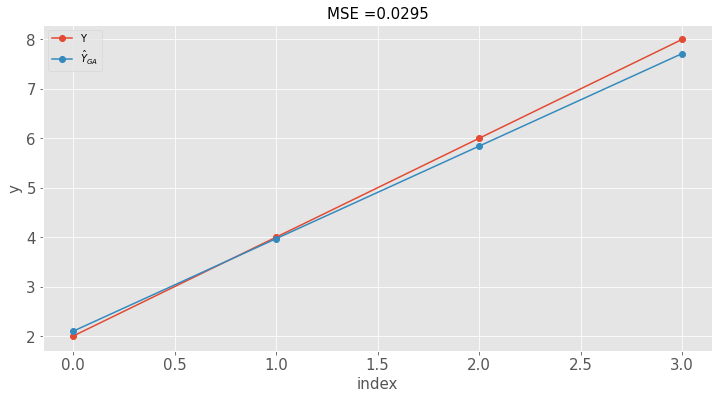

In [33]:
import matplotlib.pyplot as plt #gráficas
import matplotlib as mpl
import seaborn as sns #gráficas
plt.style.use('ggplot') #estilo de graficas

mse_GA = mse(Y_bar[0],Y)
T = list(range(len(Y)))

# Plot data and results
plt.figure(figsize = (12, 6));
plt.plot(T, Y, '-o', label='Y')
plt.plot(T, Y_bar[0], '-o', label='$\hat{Y}_{GA}$')
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);
plt.xlabel('index', fontsize = 15);
plt.ylabel('y', fontsize = 15);
plt.legend()
plt.title('MSE =' + str(round(mse_GA, 4)), fontsize = 15);

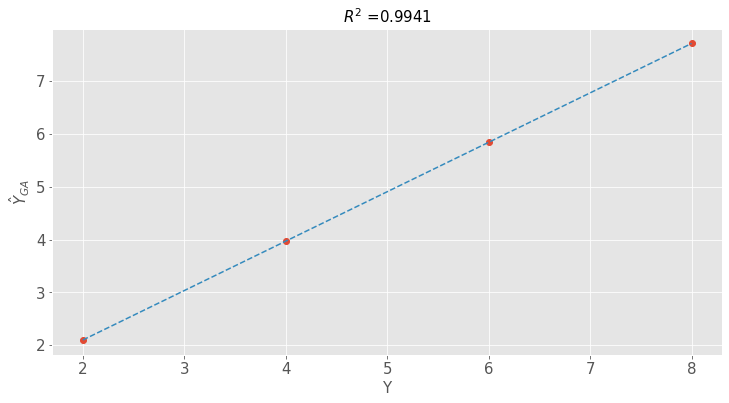

In [34]:
# Plot model fit

plt.figure(figsize = (12, 6));
plt.plot(Y, Y_bar[0], 'o')
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);
plt.xlabel('Y', fontsize = 15);
plt.ylabel('$\hat{Y}_{GA}$', fontsize = 15);
RES = sum([(Y[i] - Y_bar[0][i])**2 for i in range(len(Y))]) # residual error
TOT = sum([(Y[i] - np.mean(Y))**2 for i in range(len(Y))]) # total error
R2 = 1-(RES/TOT) # definition of R2 metric
plt.title('$R^2$ =' + str(round(R2, 4)), fontsize = 15);

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(Y, Y_bar[0], 1);

#add linear regression line to scatterplot 
plt.plot(Y, [m*i+b for i in Y], '--');